In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Nonlinear Dynamics - Unit 5
# Homework 5.4
## Question 1

Write a forward Euler (also called explicit Euler) solver for the simple harmonic oscillator ODEs with $k = 2$, $m = 0.5$, and $\beta = 0$ -- that is, no friction. Check your solver using the unit 5.3 quiz: start from the initial condition $[x(t = 0), v(t = 0)]^T = [-1, -2]^T$ with a timestep of $\Delta t = 0.1$, find $[x(t = 0.1),v(t = 0.1)]^T$ and compare it to the quiz solutions.

In [13]:
def forward_euler(f, x_0, h):
    return(x_0 + h*f(x_0))

forward_euler(lambda x: np.array([[x[1,0]],[-4*x[0,0]]]), np.array([[-1],[-2]]), 0.1)

array([[-1.2],
       [-1.6]])

 ## Question 1.a
 
Now use your forward Euler solver to compute $[x(t = 0.5),v(t = 0.5)]^T$, given the same ODE, parameters, initial condition, and time step.

In [14]:
a = np.array([[-1.0],[-2.0]])
for i in range(5):
    a = forward_euler(lambda x: np.array([[x[1,0]],[-4.0*x[0,0]]]), a, 0.1)
    print(0.1*(i+1), ":\n", a)

0.1 :
 [[-1.2]
 [-1.6]]
0.2 :
 [[-1.36]
 [-1.12]]
0.30000000000000004 :
 [[-1.472]
 [-0.576]]
0.4 :
 [[-1.5296]
 [ 0.0128]]
0.5 :
 [[-1.52832]
 [ 0.62464]]


## Question 1.b

Using the same ODE, solver, parameter values, initial condition, and time step, generate a 200-point trajectory and plot it in the state space (i.e., with the position $x$ of the mass plotted on the $x$-axis and the velocity $v$ on the $y$-axis).  Now repeat that plot with $\Delta t = 0.11$. 

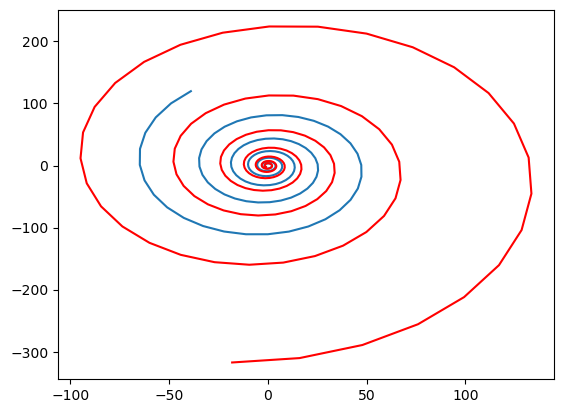

In [15]:
b = np.array([[-1.0],[-2.0]])
b_trajectory1 = b.copy()
for i in range(200):
    b = forward_euler(lambda x: np.array([[x[1,0]],[-4.0*x[0,0]]]), b, 0.1)
    b_trajectory1 = np.hstack((b_trajectory1, b))
    
b = np.array([[-1.0],[-2.0]])
b_trajectory2 = b.copy()
for i in range(200):
    b = forward_euler(lambda x: np.array([[x[1,0]],[-4.0*x[0,0]]]), b, 0.11)
    b_trajectory2 = np.hstack((b_trajectory2, b))

plt.plot(b_trajectory1[0],b_trajectory1[1])
plt.plot(b_trajectory2[0],b_trajectory2[1],'r')
plt.show()

Write a backward Euler (also called *implicit* Euler) solver for the simple harmonic oscillator ODEs with $k = 2$, $m = 0.5$, and $\beta = 0$.

In [16]:
def backward_euler(f, x_0, h):
    x_1 = forward_euler(f,x_0,h)
    return(x_0 + h*f(x_1))

## Question 2.a

Use your backward Euler solver to compute $[x(t = 0.5),v(t = 0.5)]^T$, given the same initial condition and time step as in problem 1(a) above.

In [17]:
a2 = np.array([[-1.0],[-2.0]])
for i in range(5):
    a2 = backward_euler(lambda x: np.array([[x[1,0]],[-4.0*x[0,0]]]), a2, 0.1)
    print(0.1*(i+1), ":\n", a2)

0.1 :
 [[-1.16]
 [-1.52]]
0.2 :
 [[-1.2656]
 [-0.9952]]
0.30000000000000004 :
 [[-1.314496]
 [-0.449152]]
0.4 :
 [[-1.30683136]
 [ 0.09461248]]
0.5 :
 [[-1.24509686]
 [ 0.61356052]]


## Question 2.b

Repeat problem 1(b) above using your backward Euler solver instead.

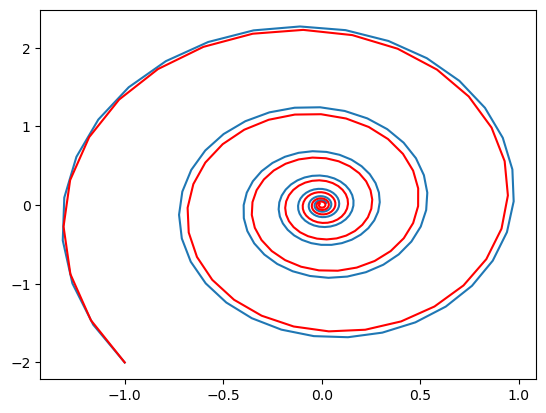

In [18]:
b2 = np.array([[-1.0],[-2.0]])
b2_trajectory1 = b2.copy()
for i in range(200):
    b2 = backward_euler(lambda x: np.array([[x[1,0]],[-4.0*x[0,0]]]), b2, 0.1)
    b2_trajectory1 = np.hstack((b2_trajectory1, b2))
    
b2 = np.array([[-1.0],[-2.0]])
b2_trajectory2 = b2.copy()
for i in range(200):
    b2 = backward_euler(lambda x: np.array([[x[1,0]],[-4.0*x[0,0]]]), b2, 0.11)
    b2_trajectory2 = np.hstack((b2_trajectory2, b2))

plt.plot(b2_trajectory1[0],b2_trajectory1[1])
plt.plot(b2_trajectory2[0],b2_trajectory2[1],'r')
plt.show()

## Question 2.c

Using the same ODE, parameter values, and initial condition, and a time step $\Delta t = 0.1$, generate two 50-point trajectories, one using forward Euler and the other using backward Euler.  Plot them both on the same state-space axes.

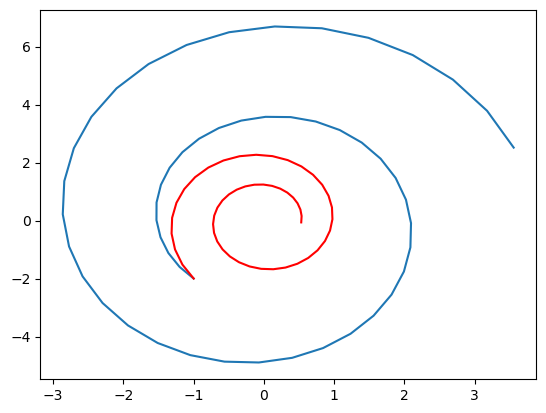

In [19]:
c2 = np.array([[-1.0],[-2.0]])
c2_trajectory1 = c2.copy()
for i in range(50):
    c2 = forward_euler(lambda x: np.array([[x[1,0]],[-4.0*x[0,0]]]), c2, 0.1)
    c2_trajectory1 = np.hstack((c2_trajectory1, c2))
    
c2 = np.array([[-1.0],[-2.0]])
c2_trajectory2 = c2.copy()
for i in range(50):
    c2 = backward_euler(lambda x: np.array([[x[1,0]],[-4.0*x[0,0]]]), c2, 0.1)
    c2_trajectory2 = np.hstack((c2_trajectory2, c2))
    
plt.plot(c2_trajectory1[0],c2_trajectory1[1])
plt.plot(c2_trajectory2[0],c2_trajectory2[1],'r')
plt.show()

#### Testing

In [20]:
q = np.array([[-1.0],[-2.0]])
for i in np.arange(0.05,0.55,0.05):
    q = forward_euler(lambda x: np.array([[x[1,0]],[-2.0*x[0,0]]]), q, 0.05)
    print(i, ":\n", q)

0.05 :
 [[-1.1]
 [-1.9]]
0.1 :
 [[-1.195]
 [-1.79 ]]
0.15000000000000002 :
 [[-1.2845]
 [-1.6705]]
0.2 :
 [[-1.368025]
 [-1.54205 ]]
0.25 :
 [[-1.4451275]
 [-1.4052475]]
0.30000000000000004 :
 [[-1.51538988]
 [-1.26073475]]
0.35000000000000003 :
 [[-1.57842661]
 [-1.10919576]]
0.4 :
 [[-1.6338864]
 [-0.9513531]]
0.45 :
 [[-1.68145406]
 [-0.78796446]]
0.5 :
 [[-1.72085228]
 [-0.61981906]]
